<h1><b>Tìm siêu tham số cho các mô hình sử dụng Grid Search

Trong Lab 6, chúng ta đã huấn luyện 4 mô hình hồi quy với siêu tham số mặc định:

* Linear Regression

* Support Vector Regression (SVR)

* K-Nearest Neighbors Regressor (KNN)

* Decision Tree Regressor

Yêu cầu: Tìm các siêu tham số tối ưu cho từng mô hình sử dụng kỹ thuật cross-validation ,
Sau đó so sánh hiệu suất của các mô hình đã được tinh chỉnh.
Các bước cụ thể:
Bước 1: Tinh chỉnh siêu tham số bằng GridSearchCV (k=5)
* SVR: C = [1, 1000, 1000000, 5000000], epsilon = [1, 1000, 10000], kernel = ['linear', 'rbf'] 
* Decision Tree Regressor: max_depth=[3, 5, 10, 20, None], min_samples_split = [2, 5, 10], min_samples_leaf: [1, 2, 5]
* KNN: n_neighbors = [3, 5, 7, 10, 20], weights = ['uniform', 'distance']

Bước 2: Đánh giá mô hình sau tinh chỉnh:
* Sử dụng tập test để đánh giá
* Tính MAE, MSE 
* Ghi nhận bộ siêu tham số tối ưu nhất tìm được từ GridSearch

Bước 3: So sánh kết quả của 4 mô hình Linear Regression, SVR, KNN, Decision Tree Regressor đã tinh chỉnh (vẽ hình, viết nhận xét (mô hình nào tốt nhất, tại sao)).

Nộp file Jupyter Notebook (.ipynb) hoàn chỉnh chứa:
* Mã nguồn
* Kết quả tuning
* So sánh mô hình
* Hình ảnh minh họa và nhận xét

Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### 1. Chuẩn bị dữ liệu

Chúng ta đọc dữ liệu từ file csv `USA_Housing.csv` bằng `pandas` gán vào biến `df`

In [2]:
df = pd.read_csv('./data/USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.drop(columns=['Address'], inplace=True)

In [5]:
scale = MinMaxScaler()
df['Avg. Area Income'] = scale.fit_transform(np.array(df['Avg. Area Income']).reshape(-1, 1))
df['Area Population'] = scale.fit_transform(np.array(df['Area Population']).reshape(-1, 1))
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,5.682861,7.009188,4.09,0.329942,1.059034e+06
1,0.683521,6.002900,6.730821,3.09,0.575968,1.505891e+06
2,0.483737,5.865890,8.512727,5.13,0.528582,1.058988e+06
3,0.506630,7.188236,5.586729,3.26,0.491549,1.260617e+06
4,0.469223,5.040555,7.839388,4.23,0.376988,6.309435e+05
...,...,...,...,...,...,...
4995,0.475738,7.830362,6.137356,3.46,0.326351,1.060194e+06
4996,0.675097,6.999135,6.576763,4.02,0.366362,1.482618e+06
4997,0.507135,7.250591,4.805081,2.13,0.476515,1.030730e+06
4998,0.558419,5.534388,7.130144,5.44,0.611282,1.198657e+06


In [6]:
y = df['Price']
X = df.drop(columns='Price')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.01)

### 2. Huấn luyện và đánh giá mô hình

#### 2.1 Mô hình Linear Regression

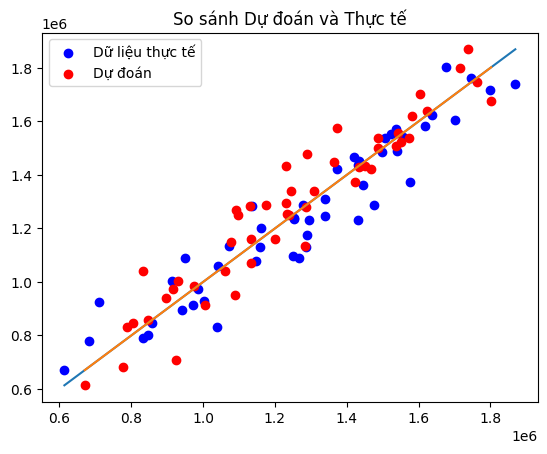

In [7]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Tính MAE, MSE
# Trong phần này không cần tìm siêu tham số tối ưu
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Vẽ biểu đồ
plt.scatter(y_test, y_pred_lr, c='blue', label='Dữ liệu thực tế')
plt.scatter(y_pred_lr, y_test, c='red', label='Dự đoán')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-')
plt.plot([min(y_pred_lr), max(y_pred_lr)], [min(y_pred_lr), max(y_pred_lr)], linestyle='-')
plt.title("So sánh Dự đoán và Thực tế")
plt.legend()

#### 2.2 Mô hình Decision Tree Regressor

Decision Tree - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree - Best CV Score (neg MSE): -26037712318.6930


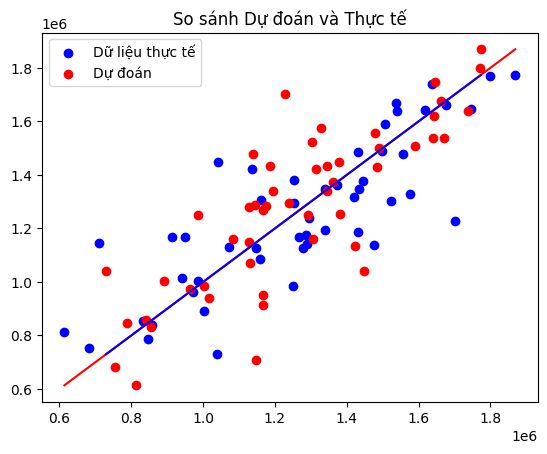

In [8]:
# Định nghĩa bộ siêu tham số với GridSearchCV cho Decision Tree Regressor
param_grid_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Fit dữ liệu
dt = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# In bộ siêu tham số tối ưu
print("Decision Tree - Best Parameters:", grid_dt.best_params_)
print("Decision Tree - Best CV Score (neg MSE): {:.4f}".format(grid_dt.best_score_))

# Dự đoán trên test và tính toán MAE, MSE
y_pred_dt = grid_dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Vẽ biểu đồ
plt.scatter(y_test, y_pred_dt, c='blue', label='Dữ liệu thực tế')
plt.scatter(y_pred_dt, y_test, c='red', label='Dự đoán')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color ='red')
plt.plot([min(y_pred_dt), max(y_pred_dt)], [min(y_pred_dt), max(y_pred_dt)], linestyle='-', color ='blue')
plt.title("So sánh Dự đoán và Thực tế")
plt.legend()


#### 2.3 Mô hình Support Vector Regression (SVR)

SVR - Best Parameters: {'C': 1000000, 'epsilon': 10000, 'kernel': 'linear'}
SVR - Best CV Score (neg MSE): -10266599306.1243


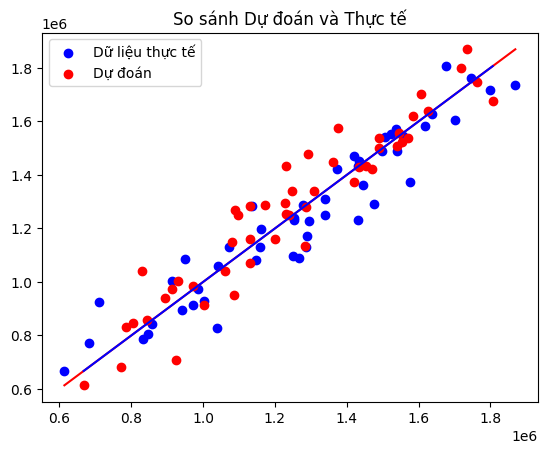

In [9]:
# Định nghĩa bộ siêu tham số với GridSearchCV cho SVR
param_grid_svr = { 
    'C': [1, 1000, 1000000, 5000000],
    'epsilon': [1, 1000, 10000],
    'kernel': ['linear', 'rbf']
}

# Fit dữ liệu
svr = SVR()
grid_svr = GridSearchCV(svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr.fit(X_train, y_train)

# In bộ siêu tham số tối ưu cho SVR
print("SVR - Best Parameters:", grid_svr.best_params_)
print("SVR - Best CV Score (neg MSE): {:.4f}".format(grid_svr.best_score_))

# Dự đoán trên test và tính toán MAE, MSE
y_pred_svr = grid_svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# Vẽ biểu đồ
plt.scatter(y_test, y_pred_svr, c='blue', label='Dữ liệu thực tế')
plt.scatter(y_pred_svr, y_test, c='red', label='Dự đoán')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color ='red')
plt.plot([min(y_pred_svr), max(y_pred_svr)], [min(y_pred_svr), max(y_pred_svr)], linestyle='-', color ='blue')
plt.title("So sánh Dự đoán và Thực tế")
plt.legend()

#### 2.4 Mô hình K-Neighbors Regressor

KNN - Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
KNN - Best CV Score (neg MSE): -44824480568.3889


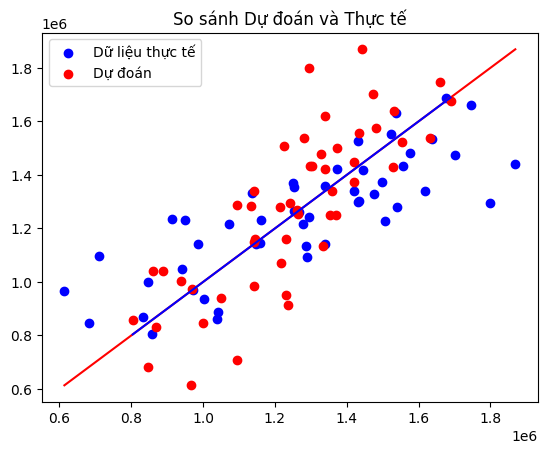

In [10]:
# Định nghĩa bộ siêu tham số với GridSearchCV cho KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 20],
    'weights': ['uniform', 'distance']
}

# Fit dữ liệu
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# In bộ siêu tham số tối ưu
print("KNN - Best Parameters:", grid_knn.best_params_)
print("KNN - Best CV Score (neg MSE): {:.4f}".format(grid_knn.best_score_))

# Dự đoán và tính toán MAE, MSE
y_pred_knn = grid_knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Vẽ biểu đồ
plt.scatter(y_test, y_pred_knn, c='blue', label='Dữ liệu thực tế')
plt.scatter(y_pred_knn, y_test, c='red', label='Dự đoán')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color ='red')
plt.plot([min(y_pred_knn), max(y_pred_knn)], [min(y_pred_knn), max(y_pred_knn)], linestyle='-', color ='blue')
plt.title("So sánh Dự đoán và Thực tế")
plt.legend()


### 3. So sánh kết quả các mô hình

In [11]:
# Tóm tắt kết quả MAE, MSE của 4 mô hình
results = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR (tuned)', 'Decision Tree (tuned)', 'KNN (tuned)'],
    'MAE': [mae_lr, mae_svr, mae_dt, mae_knn],
    'MSE': [mse_lr, mse_svr, mse_dt, mse_knn]
})
print(results)


                   Model            MAE           MSE
0      Linear Regression   75146.340598  9.405951e+09
1            SVR (tuned)   75051.775319  9.406613e+09
2  Decision Tree (tuned)  131180.274604  3.056728e+10
3            KNN (tuned)  141654.820241  3.319947e+10


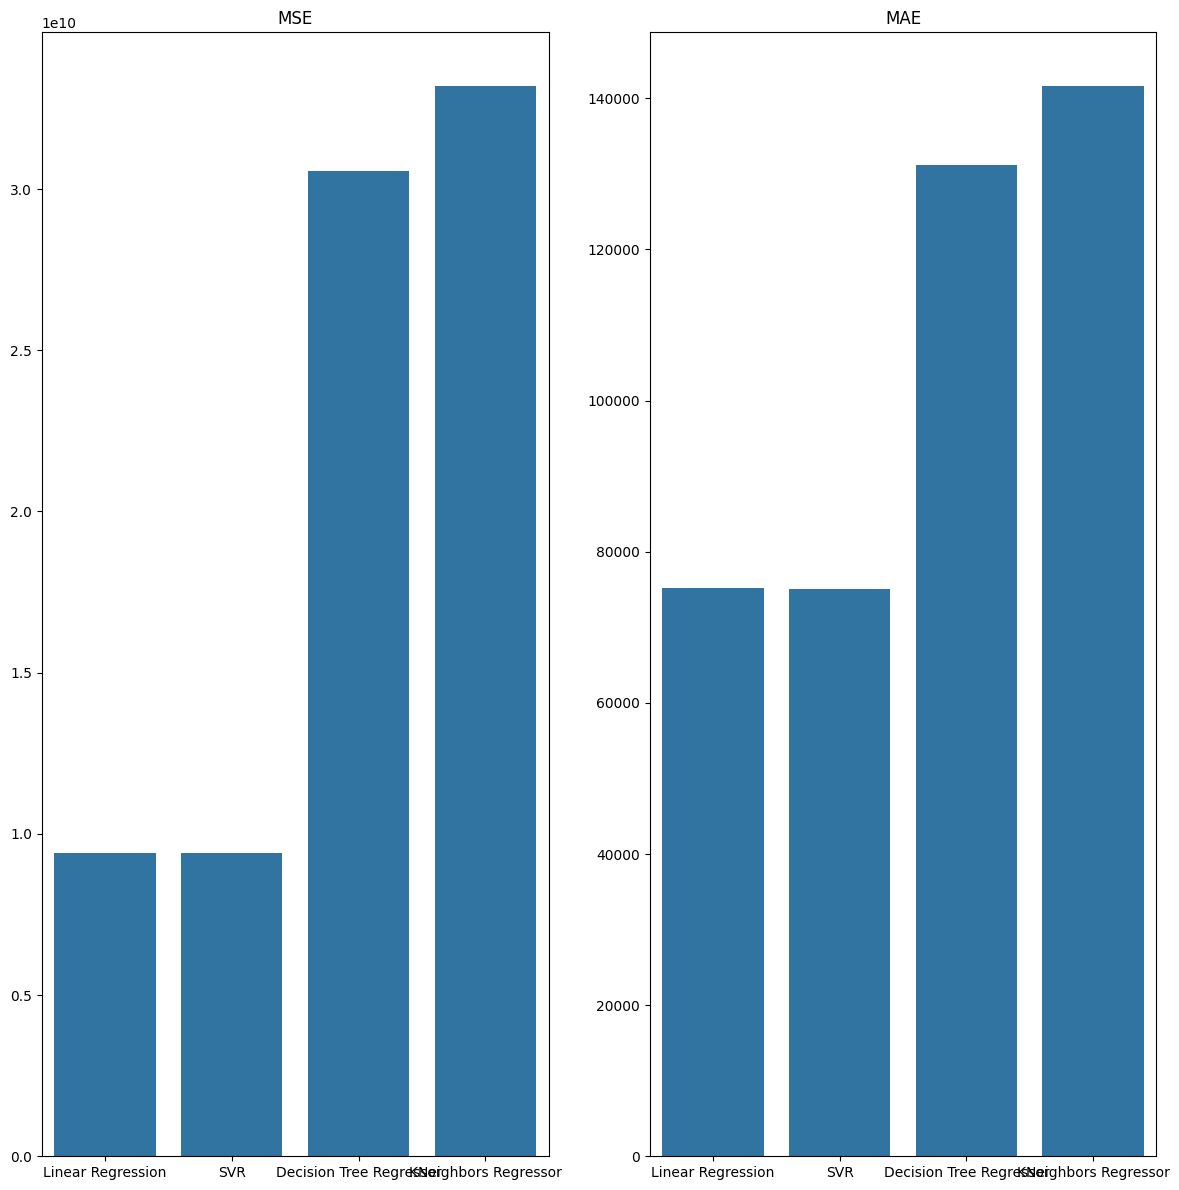

In [12]:
# Vẽ barplot so sánh các mô hình
mse = [mse_lr, mse_svr, mse_dt, mse_knn]
mae = [mae_lr, mae_svr, mae_dt, mae_knn]
label = ['Linear Regression', 'SVR', 'Decision Tree Regressor',  'KNeighbors Regressor']
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
sns.barplot(x=label, y=mse, ax=ax[0])
ax[0].set_title('MSE')
sns.barplot(x=label, y=mae, ax=ax[-1])
ax[1].set_title('MAE')
plt.tight_layout()

#### Nhận xét:
- Linear Regression mặc dù không cần chọn bộ siêu tham số, nhưng vẫn cho kết quả tốt với bộ dữ liệu so với các mô hình khác
- Sau khi chọn siêu tham số với các mô hình Decision Tree Regressor, SVR, KNeighbors Regressor, độ chính xác của mô các mô hình đã cải thiện so với kết quả ở Lab 6
- Mô hình SVR đã cải thiện nhiều khi chọn siêu tham số tối ưu, ở đây là kernel linear giúp nhận ra cấu trúc dữ liệu tốt hơn
- Việc chọn siêu tham số không ảnh hưởng lắm đến sai số của KNeighbors Regressor
- Sau khi chọn siêu tham số, Linear Regression và SVR, cho kết quả tốt như nhau, tiếp đó là Decision Tree Regressor, KNeighbors Regressor có kết quả tệ nhất. Lí do là dữ liệu ở đây có cấu trúc tuyến tính, nên các mô hình Linear Regression, Decision Tree Regressor có sai số thấp. Mặt khác, Decision Tree Regressor, KNeighbors Regressor mạnh trong việc khám phá các mối quan hệ phi tuyến của dữ liệu nên sẽ không phát huy thế mạnh với dữ liệu có cấu trúc tuyến tích, dẫn đến sai số cao hơn
